# Explore here

Se han recopilado datos socio demográficos y de recursos de salud por condado en los Estados Unidos y queremos descubrir si existe alguna relación entre los recursos sanitarios y los datos socio demográficos.

In [124]:
# Libreria:
import pandas as pd
from scipy.stats import zscore


In [125]:
total_data=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [126]:
total_data.shape

(3140, 108)

In [127]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [128]:
total_data.columns

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=108)

· Existen un total de 3140 filas de datos y 108 columnas
· Target: "Two or more races pop"

Problematica: ¿Existe alguna relación entre las carácteristicas demográficas y los recursos de salud?


DUPLICADOS

In [129]:
total_data.duplicated().sum()

np.int64(0)

No encontramos duplicados

ELIMINAR INFORMACIÓN IRRELEVANTE



In [130]:
for i in total_data.columns:
    print(i)

fips
TOT_POP
0-9
0-9 y/o % of total pop
19-Oct
10-19 y/o % of total pop
20-29
20-29 y/o % of total pop
30-39
30-39 y/o % of total pop
40-49
40-49 y/o % of total pop
50-59
50-59 y/o % of total pop
60-69
60-69 y/o % of total pop
70-79
70-79 y/o % of total pop
80+
80+ y/o % of total pop
White-alone pop
% White-alone
Black-alone pop
% Black-alone
Native American/American Indian-alone pop
% NA/AI-alone
Asian-alone pop
% Asian-alone
Hawaiian/Pacific Islander-alone pop
% Hawaiian/PI-alone
Two or more races pop
% Two or more races
POP_ESTIMATE_2018
N_POP_CHG_2018
GQ_ESTIMATES_2018
R_birth_2018
R_death_2018
R_NATURAL_INC_2018
R_INTERNATIONAL_MIG_2018
R_DOMESTIC_MIG_2018
R_NET_MIG_2018
Less than a high school diploma 2014-18
High school diploma only 2014-18
Some college or associate's degree 2014-18
Bachelor's degree or higher 2014-18
Percent of adults with less than a high school diploma 2014-18
Percent of adults with a high school diploma only 2014-18
Percent of adults completing some college 

In [131]:
columns=total_data.columns
columns_out=[]
for i in columns:
    if ("%" in str(i)):
        columns_out.append(i)
    elif ("2014-18" in str(i)):
        columns_out.append(i) 
    elif ("R_" in str(i)):
        columns_out.append(i)       
total_data.drop(columns_out,axis=1, inplace=True)
total_data.shape


(3140, 67)

In [132]:
total_data.drop("COUNTY_NAME",axis=1, inplace=True)


ANÁLISIS DE VARIABLES UNIVARIANTES

In [133]:
total_data.describe()

,fips,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,...,Obesity_number,Heart disease_prevalence,Heart disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,...,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,1.336798e+04,1.446933e+04,1.391649e+04,1.288521e+04,1.363803e+04,1.191621e+04,7220.310510,...,2.527613e+04,8.607803,5597.593312,9.095223,5827.242357,13.073503,9326.577707,3.446242,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,4.228439e+04,4.957773e+04,4.899095e+04,4.347219e+04,4.272063e+04,3.451858e+04,20287.498429,...,7.446684e+04,1.758587,15615.285499,2.344965,15720.551934,2.724351,29754.601185,0.568059,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,4.000000e+00,1.400000e+01,2.000000e+01,6.000000,...,2.500000e+01,3.500000,7.000000,3.500000,7.000000,6.100000,11.000000,1.800000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,1.374500e+03,1.263750e+03,1.232750e+03,1.245250e+03,1.483000e+03,1.476500e+03,950.750000,...,3.075000e+03,7.400000,798.500000,7.300000,815.000000,11.200000,1187.750000,3.100000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,3.274000e+03,3.108000e+03,3.000500e+03,3.048500e+03,3.515500e+03,3.410000e+03,2177.000000,...,7.182500e+03,8.600000,1814.500000,8.900000,1963.500000,12.800000,2743.000000,3.400000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,8.822250e+03,8.976250e+03,8.314250e+03,8.120500e+03,9.157250e+03,8.710500e+03,5574.000000,...,1.854250e+04,9.800000,4376.000000,10.600000,4727.000000,14.800000,6679.250000,3.800000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,1.239139e+06,1.557073e+06,1.501844e+06,1.350076e+06,1.306003e+06,1.014325e+06,572530.000000,...,2.097906e+06,15.100000,434790.000000,19.900000,434075.000000,25.600000,952335.000000,6.200000,237766.000000,6.000000


In [134]:
total_data.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [135]:
num = ['int64','O']
cat = ['O']
continuas=['float64']

df_num = total_data.select_dtypes(num)
df_cat = total_data.select_dtypes(cat)
df_continuas=total_data.select_dtypes(continuas)

VARIABLES CATEGORICAS

In [136]:
df_cat.columns

Index(['STATE_NAME'], dtype='object')

In [137]:
df_cat.head()

,STATE_NAME
0,Alabama
1,Alabama
2,Alabama
3,Alabama
4,Alabama


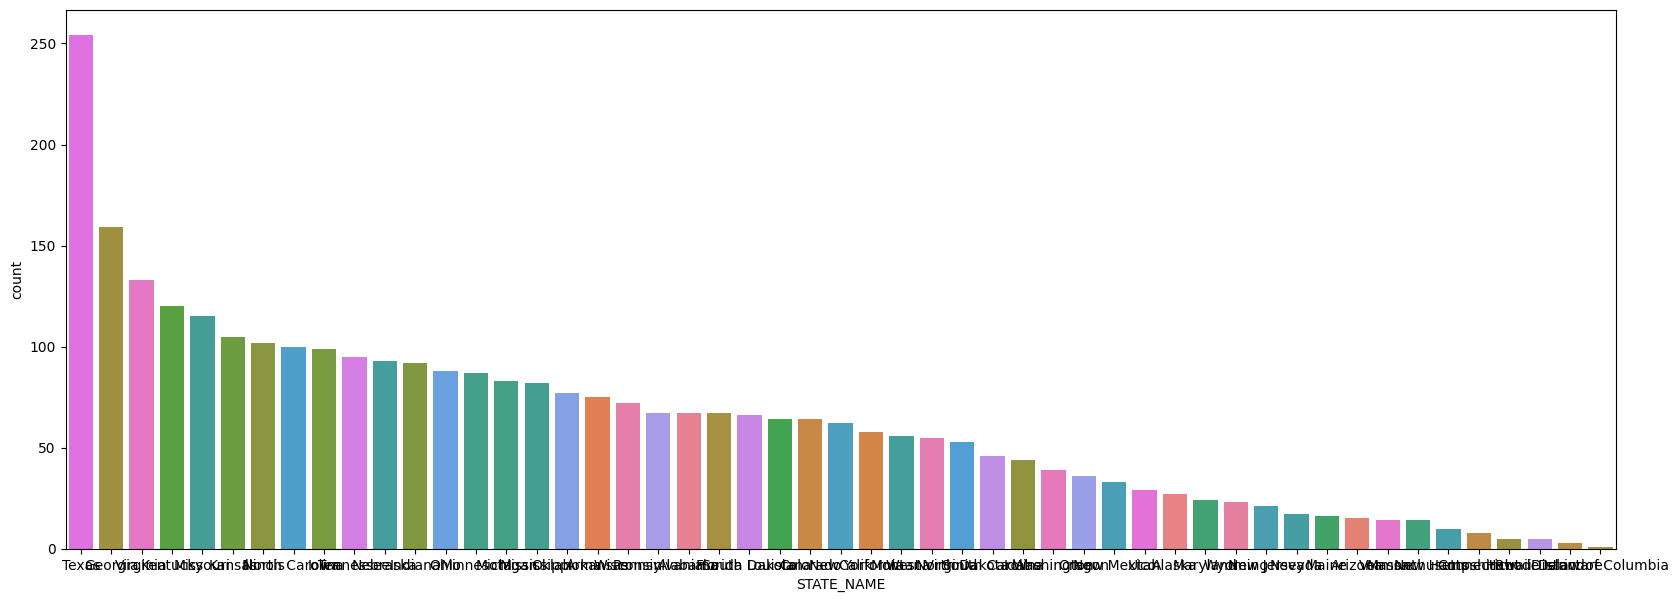

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots( figsize = (20, 7))

sns.countplot(data = df_cat, x = "STATE_NAME", order=df_cat["STATE_NAME"].value_counts().index, hue="STATE_NAME")

plt.show()

VARIABLES NUMÉRICAS

In [139]:
df_num.columns

Index(['fips', 'TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59',
       '60-69', '70-79', '80+', 'White-alone pop', 'Black-alone pop',
       'Native American/American Indian-alone pop', 'Asian-alone pop',
       'Hawaiian/Pacific Islander-alone pop', 'Two or more races pop',
       'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018',
       'POVALL_2018', 'MEDHHINC_2018', 'CI90LBINC_2018', 'CI90UBINC_2018',
       'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018',
       'Median_Household_Income_2018', 'ICU Beds_x', 'Total Population',
       'Population Aged 60+', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS',
       'county_pop2018_18 and older', 'anycondition_number', 'Obesity_number',
       'Heart disease_number', 'COPD_number', 'diabetes_number', 'CKD_number',
       'Urban_rural_code'],
      dtype='object')

In [140]:
df_num[['Heart disease_number','diabetes_number','0-9','50-59','80+','Unemployed_2018','Obesity_number','Two or more races pop']].head()

,Heart disease_number,diabetes_number,0-9,50-59,80+,Unemployed_2018,Obesity_number,Two or more races pop
0,3345,5462,6787,7738,2014,942,15193,1016
1,13414,20520,24757,29986,9368,3393,50761,3891
2,2159,3870,2732,3278,1048,433,8013,307
3,1533,2511,2456,3115,785,344,6894,242
4,4101,6017,7095,7844,2335,878,15112,801


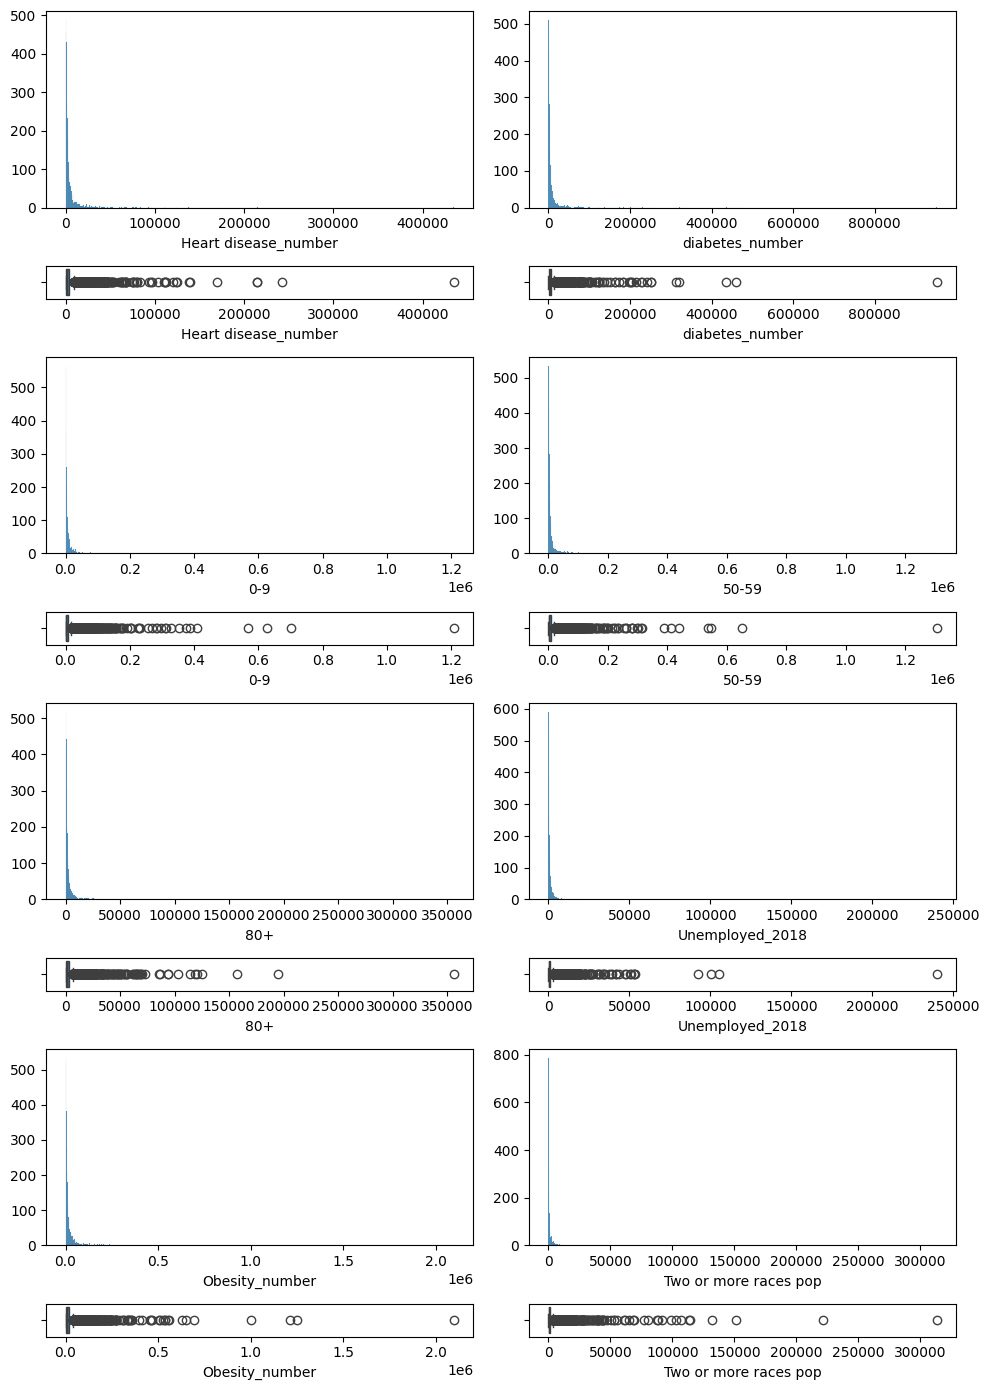

In [150]:
fig, ax = plt.subplots(8, 2, figsize=(10, 14), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1, 6, 1]})

# Charts first row 
sns.histplot(ax = ax[0,0], data = df_num, x='Heart disease_number').set(ylabel = None)
sns.boxplot(ax = ax[1,0], data = df_num, x='Heart disease_number')
sns.histplot(ax = ax[0,1], data = df_num, x='diabetes_number').set(ylabel = None)
sns.boxplot(ax = ax[1,1], data = df_num, x='diabetes_number')

# Charts second row 
sns.histplot(ax = ax[2,0], data = df_num, x='0-9').set(ylabel = None)
sns.boxplot(ax = ax[3,0], data = df_num, x='0-9')
sns.histplot(ax = ax[2,1], data = df_num, x='50-59').set(ylabel = None)
sns.boxplot(ax = ax[3,1], data = df_num, x='50-59')

# Charts third row 
sns.histplot(ax = ax[4,0], data = df_num, x='80+').set(ylabel = None)
sns.boxplot(ax = ax[5,0], data = df_num, x='80+')
sns.histplot(ax = ax[4,1], data = df_num, x='Unemployed_2018').set(ylabel = None)
sns.boxplot(ax = ax[5,1], data = df_num, x='Unemployed_2018')

# Charts last row 
sns.histplot(ax = ax[6,0], data = df_num, x='Obesity_number').set(ylabel = None)
sns.boxplot(ax = ax[7,0], data = df_num, x='Obesity_number')
sns.histplot(ax = ax[6,1], data = df_num, x='Two or more races pop').set(ylabel = None)
sns.boxplot(ax = ax[7,1], data = df_num, x='Two or more races pop')

plt.tight_layout()
plt.show()

VARIABLES CONTINUAS

In [ ]:
df_continuas.columns


Index(['PCTPOVALL_2018', 'PCTPOV017_2018', 'PCTPOV517_2018',
       'Unemployment_rate_2018', 'Med_HH_Income_Percent_of_State_Total_2018',
       'Active Physicians per 100000 Population 2018 (AAMC)',
       'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)',
       'Active Primary Care Physicians per 100000 Population 2018 (AAMC)',
       'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)',
       'Active General Surgeons per 100000 Population 2018 (AAMC)',
       'Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)',
       'Total nurse practitioners (2019)', 'Total physician assistants (2019)',
       'Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)',
       'Family Medicine/General Practice Primary Care (2019)',
       'Total Specialist Physicians (2019)', 'Percent of Population Aged 60+',
       'anycondition_prevalence', 'Obesity_prevalence',
       'Heart disease_prevalence', 'COPD_prevalence', 